<h2><center>Estadística Descriptiva, algunos conceptos básicos</center></h2> 




**Cada vez que te inicias en una nueva herramienta es bueno contar con "cheat sheets" para ir aprendiendo sus comandos:**

* [Jupyter Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Jupyter_Notebook_Cheat_Sheet.pdf)
* [NumPy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Pandas 1](https://datacamp-community-prod.s3.amazonaws.com/fbc502d0-46b2-4e1b-b6b0-5402ff273251)
* [Pandas 2](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8)
* [Matplotlib](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b)
* [Seaborn](https://datacamp-community-prod.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4)
* [Scikit Learn](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116)

### Estadística Descriptiva

Se dedica a recolectar, ordenar, analizar y representar a un conjunto de datos, con el fin de describir apropiadamente las características de este. Se utilizan distintas medidas para intentar describir las propiedades de nuestros datos como por ejemplo:

**Media aritmética:** La media aritmética es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos.



In [1]:
import statistics as st
nums=[1,2,3,5,7,9]
st.mean(nums)

4.5

In [2]:
import numpy as np
nums.mean()

AttributeError: 'list' object has no attribute 'mean'

In [3]:
# Recordar que para trabajar con numpy debemos tener los datos en un array

import numpy as np # importando numpy
my_nums = np.array(nums)
my_nums.mean()

4.5

**Moda:** La moda es el valor que tiene mayor frecuencia absoluta. 



In [4]:
nums=[1,2,3,5,7,9,7,2,7,6]
st.mode(nums)


7

In [7]:
my_nums = np.array(nums)
my_nums

array([1, 2, 3, 5, 7, 9, 7, 2, 7, 6])

In [8]:
from scipy import stats # importando scipy.stats
moda = stats.mode(my_nums) 
moda

ModeResult(mode=array([7]), count=array([3]))

**Mediana:** La mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. 
  



In [14]:
nums=[1,2,3,5,7,9,7,2,7,6]
st.median(nums) 


5.5

In [18]:
np.median(my_nums)

5.5

**Varianza:** es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística. La varianza intenta describir la dispersión de los datos.


In [22]:
# Varianza poblacional de los datos
st.pvariance(nums)

6.69

In [23]:
np.var(my_nums)

6.6899999999999995

## Existen mas medidas pero por ahora solo mostraremos esos ejemplo

### Existen dos tipos de variables:

**Cuantitativas:** Aquellas con las que tiene sentido hacer operaciones aritméticas como sumar o multiplicar.

**Cualitativas:** Las que no son cuantitativas. Usualmente sirven para categorizar a los individuos (sexo, color, especie, marca) o para identificar (nombre, número de identificación). (Ej: un número de un documento de identificación emitido por el estado es una variable cualitativa que sirve para identificar y con la que no tiene ningún sentido realizar operaciones aritméticas.)

**Desviación típica:** La desviación típica es la raíz cuadrada de la varianza. 


![Imagen1](img1.png)

## Recordatorio : Tipos de datos en Python

Trabajaremos usualmente con los tipos de datos de la librería pandas, los cuales se describen a continuación:

**float64:** De tipo decimal. Por regla general, las variables almacenadas de esta manera serán cuantitativas
    
**int64:** Referencia a un dato de tipo entero. Sirve para representar variables cuantitativas (conteo de ocurrencias de algún suceso como cantidad de niños nacidos en un año) o cualitativas (número de identificación. Aunque también podría almacenarse como string o texto, pero los enteros tienen la ventaja de ocupar menos memoria.)

**bool:** Es un tipo de datos que sólo puede tomar dos valores: True (verdadero) o False (falso). 

**datetime64:** Es uno de los tipos de datos que utiliza python para almacenar fechas (Ej cuando se usa la librería datetime)
    
**timedelta64:** Con este tipo de datos, pandas almacena períodos de tiempo, o diferencias entre fechas.

**object:** Almacena texto o cualquier otro tipo de objeto de python que no esté previsto en los tipos de datos de pandas. Usualmente será el tipo de datos con el que almacenemos variables cualitativas.

![Imagen2](img2.png)

# Ejemplo para leer un csv utilizando csv

En este ejemplo veremos como cargar un archivo csv y guardarlo en una lista o guardarlo en un diccionario y hacer un gráfico.  

Pasos previos:  
1. Para esto tomaré los datos del censo de Chile descargados de [aquí](http://www.censo2017.cl/descargue-aqui-resultados-de-comunas/)
2. Voy a tomar los datos del resultado sexo/edad. Iré a la segunda hoja del excel en excel copiaré los datos y los voy a guardar en un archivo separado por comas llamado **censo.csv** o descargarlos directo a tu PC o google drive desde [aquí](https://github.com/malegria01/AnalisisDatos/blob/main/data/censo.csv)

En el ejercicio:  

1. Tomaré los datos desde censo.csv
2. Graficaré el total por región de hombres y mujeres

#### Comenzamos cargando la libreria [csv](https://docs.python.org/3/library/csv.html) y de la libreria [matplotlib](https://matplotlib.org/) sólo el paquete [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) y ocuparemos [numpy](https://numpy.org/) para algunos calculos en la generación de la gráfica.  


Para no tener que llamar a las funciones de `matplotlib.pyplot` de forma extensa:  
Por ejemplo para graficar tendríamos que escribir `matplotlib.pyplot.plot`, le pondremos un alias a `matplotlib.pyplot`,  

Por consenso ese alias es `plt` de esta manera si queremos hacer un gráfico bastaria con escribir `plt.plot` en vez de `matplotlib.pyplot.plot`. Lo mismo con numpy

In [27]:
import csv
import matplotlib.pyplot as plt
import numpy as np


#### Ahora leeremos un archivo que censo.csv. Recordar que debe estar en la misma carpeta donde ejecutamos este notebook, en caso contrario, hay que dar la ruta completa

Si lo escribieramos en castellano sería:  

``` 

con abrir('censo.csv') como archivo_csv:  
    leer = csv.lector(archivo_csv, delimitador=',')... 
    
```

In [26]:
with open("censo.csv", "r") as csv_file:
    lector = csv.reader(csv_file, delimiter=',')
    for lines in lector:
        print(lines)

['ORDEN', 'NOMBRE REGIÓN', 'Código Región', 'NOMBRE PROVINCIA', 'Código Provincia', 'NOMBRE COMUNA', 'Código Comuna', 'Edad', 'Hombres', 'Mujeres', 'TOTAL']
['0', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'Total País', '8601989', '8972014', '17574003']
['1', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '0 a 4', '594059', '572087', '1166146']
['2', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '5 a 9', '618121', '592068', '1210189']
['3', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '10 a 14', '585855', '561560', '1147415']
['4', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '15 a 19', '636064', '608633', '1244697']
['5', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '20 a 24', '702706', '685116', '1387822']
['6', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '25 a 29', '742265', '731885', '1474150']
['7', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '30 a 34', '645359', '648278', '1293637']
['8', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '35 a 39', '595608'

['1658', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '35 a 39', '765', '791', '1556']
['1659', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '40 a 44', '756', '840', '1596']
['1660', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '45 a 49', '814', '860', '1674']
['1661', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '50 a 54', '859', '824', '1683']
['1662', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '55 a 59', '759', '762', '1521']
['1663', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '60 a 64', '617', '668', '1285']
['1664', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '65 a 69', '491', '490', '981']
['1665', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '70 a 74', '376', '417', '793']
['1666', 'VALPARAÍSO', '5', 'SAN FELIPE DE ACONCAGUA', '57', 'LLAILLAY', '5703', '75 a 79'

['3454', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 'PAREDONES', '6206', 'Total Comunal', '3220', '2968', '6188']
['3455', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 'PAREDONES', '6206', '0 a 4', '143', '144', '287']
['3456', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 'PAREDONES', '6206', '5 a 9', '167', '178', '345']
['3457', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 'PAREDONES', '6206', '10 a 14', '174', '173', '347']
['3458', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 'PAREDONES', '6206', '15 a 19', '184', '159', '343']
['3459', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 'PAREDONES', '6206', '20 a 24', '160', '148', '308']
['3460', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 'PAREDONES', '6206', '25 a 29', '179', '173', '352']
['3461', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'CARDENAL CARO', '62', 

['5079', 'BIOBÍO', '8', 'BIOBÍO', '83', 'ALTO BIOBÍO', '8314', '90 a 94', '2', '5', '7']
['5080', 'BIOBÍO', '8', 'BIOBÍO', '83', 'ALTO BIOBÍO', '8314', '95 a 99', '1', '0', '1']
['5081', 'BIOBÍO', '8', 'BIOBÍO', '83', 'ALTO BIOBÍO', '8314', '100 o más', '0', '2', '2']
['5082', 'BIOBÍO', '8', 'ÑUBLE * desde sept. 2018 región ÑUBLE', '84', 'CHILLÁN *', '8401', 'Total Comunal', '87521', '97218', '184739']
['5083', 'BIOBÍO', '8', 'ÑUBLE * desde sept. 2018 región ÑUBLE', '84', 'CHILLÁN *', '8401', '0 a 4', '6056', '5577', '11633']
['5084', 'BIOBÍO', '8', 'ÑUBLE * desde sept. 2018 región ÑUBLE', '84', 'CHILLÁN *', '8401', '5 a 9', '6302', '6066', '12368']
['5085', 'BIOBÍO', '8', 'ÑUBLE * desde sept. 2018 región ÑUBLE', '84', 'CHILLÁN *', '8401', '10 a 14', '6283', '6109', '12392']
['5086', 'BIOBÍO', '8', 'ÑUBLE * desde sept. 2018 región ÑUBLE', '84', 'CHILLÁN *', '8401', '15 a 19', '7085', '6794', '13879']
['5087', 'BIOBÍO', '8', 'ÑUBLE * desde sept. 2018 región ÑUBLE', '84', 'CHILLÁN *', '8

['6773', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CHONCHI', '10203', '90 a 94', '15', '36', '51']
['6774', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CHONCHI', '10203', '95 a 99', '5', '6', '11']
['6775', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CHONCHI', '10203', '100 o más', '0', '1', '1']
['6776', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CURACO DE VÉLEZ', '10204', 'Total Comunal', '1853', '1976', '3829']
['6777', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CURACO DE VÉLEZ', '10204', '0 a 4', '113', '84', '197']
['6778', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CURACO DE VÉLEZ', '10204', '5 a 9', '152', '135', '287']
['6779', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CURACO DE VÉLEZ', '10204', '10 a 14', '137', '171', '308']
['6780', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CURACO DE VÉLEZ', '10204', '15 a 19', '150', '157', '307']
['6781', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CURACO DE VÉLEZ', '10204', '20 a 24', '117', '98', '215']
['6782', 'LOS LAGOS', '10', 'CHILOÉ', '102', 'CURACO DE VÉLEZ', '10204', '25 a 29', '100

In [28]:
#Sólo queremos guardar el nombre de las columnas
# 1.- definimos variables de almacenamiento 
# 2.- guardaremos los nombres de las columnas en este arreglo
# 3.- Solo queremos guardar la primera fila, ya que es el nombre de cada columna. 

columnas=[]

with open('censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    for lines in lector:
        if contador==0:
            columnas=lines
            contador=1;
            

            

In [29]:
columnas

['ORDEN',
 'NOMBRE REGIÓN',
 'Código Región',
 'NOMBRE PROVINCIA',
 'Código Provincia',
 'NOMBRE COMUNA',
 'Código Comuna',
 'Edad',
 'Hombres',
 'Mujeres',
 'TOTAL']

### Otra forma:

In [30]:
columnas2=[]
with open("censo.csv", "r") as csv_file:
    lector = csv.reader(csv_file, delimiter=',')
    for lines in lector:
        columnas2=lines
        break

In [31]:
columnas2

['ORDEN',
 'NOMBRE REGIÓN',
 'Código Región',
 'NOMBRE PROVINCIA',
 'Código Provincia',
 'NOMBRE COMUNA',
 'Código Comuna',
 'Edad',
 'Hombres',
 'Mujeres',
 'TOTAL']

In [32]:
columnas2=[]
with open("censo.csv", "r") as csv_file:
    lector = csv.reader(csv_file, delimiter=',')
    header = next(lector)
print(header)

['ORDEN', 'NOMBRE REGIÓN', 'Código Región', 'NOMBRE PROVINCIA', 'Código Provincia', 'NOMBRE COMUNA', 'Código Comuna', 'Edad', 'Hombres', 'Mujeres', 'TOTAL']


Podemos ver que el nombre de la región serian los datos por fila alojados en ```row[1]``` y vamos a trabajar con los datos de hombres y mujeres que vendrían siendo ```row[8]``` y ```row[9]``` respectivamente  

Entonces repetimos el código anterior, pero ahora crearemos una estructura de datos que nos permita guardar los mismos, para esto utilizaremos un diccionario donde iremos acumulando los valores por región
  
Por ejemplo:  

```data['Arica y Parinacota']['Mujeres']```

In [33]:
data={}

with open('censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    #No queremos leer el nombre de las columnas, queremos emperzar de la row 1 en adelante.
    for row in lector:
        if contador==0:
            contador=1;
        else:
            data[row[1]]['Mujeres']=data[row[1]]['Mujeres']+int(row[9])
            data[row[1]]['Hombres']=data[row[1]]['Hombres']+int(row[8])
            


KeyError: 'PAÍS'

In [34]:
columnas2=[]
with open("censo.csv", "r") as csv_file:
    lector = csv.reader(csv_file, delimiter=',')
    #si no queremos imprimir la primera fla
    #header = next(lector)
    for lines in lector:
        print(lines)


['ORDEN', 'NOMBRE REGIÓN', 'Código Región', 'NOMBRE PROVINCIA', 'Código Provincia', 'NOMBRE COMUNA', 'Código Comuna', 'Edad', 'Hombres', 'Mujeres', 'TOTAL']
['0', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'Total País', '8601989', '8972014', '17574003']
['1', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '0 a 4', '594059', '572087', '1166146']
['2', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '5 a 9', '618121', '592068', '1210189']
['3', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '10 a 14', '585855', '561560', '1147415']
['4', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '15 a 19', '636064', '608633', '1244697']
['5', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '20 a 24', '702706', '685116', '1387822']
['6', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '25 a 29', '742265', '731885', '1474150']
['7', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '30 a 34', '645359', '648278', '1293637']
['8', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', 'PAÍS', '35 a 39', '595608'

['768', 'COQUIMBO', '4', 'ELQUI', '41', 'PAIGUANO', '4105', '95 a 99', '1', '0', '1']
['769', 'COQUIMBO', '4', 'ELQUI', '41', 'PAIGUANO', '4105', '100 o más', '0', '0', '0']
['770', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', 'Total Comunal', '13792', '13979', '27771']
['771', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '0 a 4', '978', '937', '1915']
['772', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '5 a 9', '1122', '1076', '2198']
['773', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '10 a 14', '979', '974', '1953']
['774', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '15 a 19', '990', '960', '1950']
['775', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '20 a 24', '969', '936', '1905']
['776', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '25 a 29', '1032', '1057', '2089']
['777', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '30 a 34', '925', '952', '1877']
['778', 'COQUIMBO', '4', 'ELQUI', '41', 'VICUÑA', '4106', '35 a 39', '817', '913', '173

['1380', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'QUILLOTA', '5501', '75 a 79', '911', '1201', '2112']
['1381', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'QUILLOTA', '5501', '80 a 84', '589', '957', '1546']
['1382', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'QUILLOTA', '5501', '85 a 89', '364', '651', '1015']
['1383', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'QUILLOTA', '5501', '90 a 94', '117', '278', '395']
['1384', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'QUILLOTA', '5501', '95 a 99', '21', '69', '90']
['1385', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'QUILLOTA', '5501', '100 o más', '9', '19', '28']
['1386', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'CALERA', '5502', 'Total Comunal', '24462', '26092', '50554']
['1387', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'CALERA', '5502', '0 a 4', '1659', '1604', '3263']
['1388', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'CALERA', '5502', '5 a 9', '1898', '1782', '3680']
['1389', 'VALPARAÍSO', '5', 'QUILLOTA', '55', 'CALERA', '5502', '10 a 14', '1764', '1698', '3462']
['1390', 'VA

['2112', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', 'Total Comunal', '135917', '158921', '294838']
['2113', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', '0 a 4', '8260', '7938', '16198']
['2114', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', '5 a 9', '7502', '7183', '14685']
['2115', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', '10 a 14', '7230', '6906', '14136']
['2116', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', '15 a 19', '9195', '9012', '18207']
['2117', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', '20 a 24', '12172', '12295', '24467']
['2118', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', '25 a 29', '12858', '13142', '26000']
['2119', 'METROPOLITANA DE SANTIAGO', '13', 'SANTIAGO', '131', 'LAS CONDES', '13114', '30 a 34', '11541', '12080', '23621']
['2120', 'M

['2860', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', 'Total Comunal', '36769', '37468', '74237']
['2861', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', '0 a 4', '2727', '2624', '5351']
['2862', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', '5 a 9', '2807', '2687', '5494']
['2863', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', '10 a 14', '2618', '2496', '5114']
['2864', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', '15 a 19', '2839', '2717', '5556']
['2865', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', '20 a 24', '3145', '2888', '6033']
['2866', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', '25 a 29', '3074', '2998', '6072']
['2867', 'METROPOLITANA DE SANTIAGO', '13', 'TALAGANTE', '136', 'TALAGANTE', '13601', '30 a 34', '2690', '2560', '5250']
['2868', 'METROPOLITANA DE 

['3582', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'NANCAGUA', '6305', '85 a 89', '67', '97', '164']
['3583', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'NANCAGUA', '6305', '90 a 94', '20', '36', '56']
['3584', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'NANCAGUA', '6305', '95 a 99', '5', '15', '20']
['3585', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'NANCAGUA', '6305', '100 o más', '3', '3', '6']
['3586', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'PALMILLA', '6306', 'Total Comunal', '6331', '6151', '12482']
['3587', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'PALMILLA', '6306', '0 a 4', '382', '374', '756']
['3588', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'PALMILLA', '6306', '5 a 9', '401', '385', '786']
['3589', "LIBERTADOR GENERAL BERNARDO O'HIGGINS", '6', 'COLCHAGUA', '63', 'PALMILLA', '6306', '10 a 14', '436', '361', '797']

['4567', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '60 a 64', '3974', '4706', '8680']
['4568', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '65 a 69', '2907', '3281', '6188']
['4569', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '70 a 74', '1914', '2567', '4481']
['4570', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '75 a 79', '1251', '1973', '3224']
['4571', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '80 a 84', '837', '1394', '2231']
['4572', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '85 a 89', '497', '957', '1454']
['4573', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '90 a 94', '139', '403', '542']
['4574', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '95 a 99', '36', '91', '127']
['4575', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TALCAHUANO', '8110', '100 o más', '14', '26', '40']
['4576', 'BIOBÍO', '8', 'CONCEPCIÓN', '81', 'TOMÉ', '8111', 'Total Comunal', '25919', '29027', '54946']
['

['5590', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '5 a 9', '571', '564', '1135']
['5591', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '10 a 14', '612', '567', '1179']
['5592', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '15 a 19', '600', '584', '1184']
['5593', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '20 a 24', '514', '533', '1047']
['5594', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '25 a 29', '528', '564', '1092']
['5595', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '30 a 34', '461', '488', '949']
['5596', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '35 a 39', '442', '475', '917']
['5597', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '40 a 44', '583', '594', '1177']
['5598', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '45 a 49', '617', '615', '1232']
['5599', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91', 'CUNCO', '9103', '50 a 54', '660', '545', '1205']
['5600', 'LA ARAUCANÍA', '9', 'CAUTÍN', '91'

['6587', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '40 a 44', '466', '398', '864']
['6588', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '45 a 49', '439', '479', '918']
['6589', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '50 a 54', '530', '446', '976']
['6590', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '55 a 59', '433', '397', '830']
['6591', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '60 a 64', '393', '351', '744']
['6592', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '65 a 69', '299', '289', '588']
['6593', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '70 a 74', '225', '219', '444']
['6594', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '75 a 79', '177', '168', '345']
['6595', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '80 a 84', '103', '142', '245']
['6596', 'LOS LAGOS', '10', 'LLANQUIHUE', '101', 'FRESIA', '10104', '85 a 89', '61', '82', '143']
['

['6974', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', 'Total Comunal', '9976', '10393', '20369']
['6975', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '0 a 4', '662', '641', '1303']
['6976', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '5 a 9', '704', '681', '1385']
['6977', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '10 a 14', '723', '670', '1393']
['6978', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '15 a 19', '723', '703', '1426']
['6979', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '20 a 24', '650', '702', '1352']
['6980', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '25 a 29', '733', '719', '1452']
['6981', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '30 a 34', '567', '622', '1189']
['6982', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '35 a 39', '551', '567', '1118']
['6983', 'LOS LAGOS', '10', 'OSORNO', '103', 'PURRANQUE', '10303', '40 a 44', '654', '659', '1

['7600', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚLTIMA ESPERANZA', '124', 'NATALES', '12401', '45 a 49', '706', '666', '1372']
['7601', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚLTIMA ESPERANZA', '124', 'NATALES', '12401', '50 a 54', '658', '675', '1333']
['7602', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚLTIMA ESPERANZA', '124', 'NATALES', '12401', '55 a 59', '627', '591', '1218']
['7603', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚLTIMA ESPERANZA', '124', 'NATALES', '12401', '60 a 64', '575', '576', '1151']
['7604', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚLTIMA ESPERANZA', '124', 'NATALES', '12401', '65 a 69', '483', '432', '915']
['7605', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚLTIMA ESPERANZA', '124', 'NATALES', '12401', '70 a 74', '343', '363', '706']
['7606', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚLTIMA ESPERANZA', '124', 'NATALES', '12401', '75 a 79', '248', '270', '518']
['7607', 'MAGALLANES Y DE LA ANTÁRTICA CHILENA', '12', 'ÚL

In [37]:
# Se trabaja con try except para manipular el error

data={}

with open('censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    #No queremos leer el nombre de las columnas, queremos emperzar de la row 1 en adelante.
    for row in lector:
        if contador==0:
            contador=1;
        else:
            try:
                data[row[1]]['Mujeres']=data[row[1]]['Mujeres']+int(row[9])
                data[row[1]]['Hombres']=data[row[1]]['Hombres']+int(row[8])
            except KeyError:
                data[row[1]]={'Hombres':0, 'Mujeres': 0}
                data[row[1]]['Mujeres']=int(row[9])
                data[row[1]]['Hombres']=int(row[8])
            


In [38]:
data

{'PAÍS': {'Hombres': 17203978, 'Mujeres': 17944028},
 'ARICA Y PARINACOTA': {'Hombres': 225162, 'Mujeres': 226974},
 'TARAPACÁ': {'Hombres': 335586, 'Mujeres': 325530},
 'ANTOFAGASTA': {'Hombres': 630028, 'Mujeres': 585040},
 'ATACAMA': {'Hombres': 288840, 'Mujeres': 283496},
 'COQUIMBO': {'Hombres': 737548, 'Mujeres': 777624},
 'VALPARAÍSO': {'Hombres': 1760430, 'Mujeres': 1871374},
 'METROPOLITANA DE SANTIAGO': {'Hombres': 6924534, 'Mujeres': 7301082},
 "LIBERTADOR GENERAL BERNARDO O'HIGGINS": {'Hombres': 907420,
  'Mujeres': 921690},
 'MAULE': {'Hombres': 1023248, 'Mujeres': 1066652},
 'BIOBÍO': {'Hombres': 1966634, 'Mujeres': 2108194},
 'LA ARAUCANÍA': {'Hombres': 930262, 'Mujeres': 984186},
 'LOS RÍOS': {'Hombres': 377694, 'Mujeres': 391980},
 'LOS LAGOS': {'Hombres': 818800, 'Mujeres': 838616},
 'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO': {'Hombres': 107294,
  'Mujeres': 99022},
 'MAGALLANES Y DE LA ANTÁRTICA CHILENA': {'Hombres': 170498,
  'Mujeres': 162568}}

Como podemos ver tenemos total país con muchas mujeres y muchos hombres, esto se debe a que hay un total comuna y total país en la plantilla **censo.csv**. Además el ejercicio debe considerar el total regional y no el total país así que debemos eliminar esto de nuestro diccionario en un futuro.

Entonces debemos filtrar nuestros datos y cuando en edad (`row[7]`) encontremos la palabra Total debemos saltar esa fila. Hay varias formas de programar esto, una de ellas es la siguiente.

In [39]:
data={}
#agregamos el string total
total="Total"

with open('censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    for row in lector:
        if contador==0:
            contador=1;
        else:
            if total in row[7]:
                print("Me salto línea de "+row[5]+" que nos dice "+row[7]+" con total hombres:"+ row[8] + " total mujeres:"+row[9])
            else:
                try:
                    data[row[1]]['Mujeres']=data[row[1]]['Mujeres']+int(row[9])
                    data[row[1]]['Hombres']=data[row[1]]['Hombres']+int(row[8])
                except KeyError:
                    data[row[1]]={'Hombres':0, 'Mujeres': 0}
                    data[row[1]]['Mujeres']=int(row[9])
                    data[row[1]]['Hombres']=int(row[8])

Me salto línea de PAÍS que nos dice Total País con total hombres:8601989 total mujeres:8972014
Me salto línea de ARICA que nos dice Total Comunal con total hombres:109389 total mujeres:111975
Me salto línea de CAMARONES que nos dice Total Comunal con total hombres:726 total mujeres:529
Me salto línea de PUTRE que nos dice Total Comunal con total hombres:2054 total mujeres:711
Me salto línea de GENERAL LAGOS que nos dice Total Comunal con total hombres:412 total mujeres:272
Me salto línea de IQUIQUE que nos dice Total Comunal con total hombres:94897 total mujeres:96571
Me salto línea de ALTO HOSPICIO que nos dice Total Comunal con total hombres:54206 total mujeres:54169
Me salto línea de POZO ALMONTE que nos dice Total Comunal con total hombres:8987 total mujeres:6724
Me salto línea de CAMIÑA que nos dice Total Comunal con total hombres:657 total mujeres:593
Me salto línea de COLCHANE que nos dice Total Comunal con total hombres:995 total mujeres:733
Me salto línea de HUARA que nos dice

In [40]:
data

{'PAÍS': {'Hombres': 8601989, 'Mujeres': 8972014},
 'ARICA Y PARINACOTA': {'Hombres': 112581, 'Mujeres': 113487},
 'TARAPACÁ': {'Hombres': 167793, 'Mujeres': 162765},
 'ANTOFAGASTA': {'Hombres': 315014, 'Mujeres': 292520},
 'ATACAMA': {'Hombres': 144420, 'Mujeres': 141748},
 'COQUIMBO': {'Hombres': 368774, 'Mujeres': 388812},
 'VALPARAÍSO': {'Hombres': 880215, 'Mujeres': 935687},
 'METROPOLITANA DE SANTIAGO': {'Hombres': 3462267, 'Mujeres': 3650541},
 "LIBERTADOR GENERAL BERNARDO O'HIGGINS": {'Hombres': 453710,
  'Mujeres': 460845},
 'MAULE': {'Hombres': 511624, 'Mujeres': 533326},
 'BIOBÍO': {'Hombres': 983317, 'Mujeres': 1054097},
 'LA ARAUCANÍA': {'Hombres': 465131, 'Mujeres': 492093},
 'LOS RÍOS': {'Hombres': 188847, 'Mujeres': 195990},
 'LOS LAGOS': {'Hombres': 409400, 'Mujeres': 419308},
 'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO': {'Hombres': 53647,
  'Mujeres': 49511},
 'MAGALLANES Y DE LA ANTÁRTICA CHILENA': {'Hombres': 85249, 'Mujeres': 81284}}

Ahora podemos ver que efectivamente tenemos aprox: 18 millones de habitantes.  

**Borramos de nuestro diccionario a PAÍS**

In [41]:
del data['PAÍS']

In [42]:
data

{'ARICA Y PARINACOTA': {'Hombres': 112581, 'Mujeres': 113487},
 'TARAPACÁ': {'Hombres': 167793, 'Mujeres': 162765},
 'ANTOFAGASTA': {'Hombres': 315014, 'Mujeres': 292520},
 'ATACAMA': {'Hombres': 144420, 'Mujeres': 141748},
 'COQUIMBO': {'Hombres': 368774, 'Mujeres': 388812},
 'VALPARAÍSO': {'Hombres': 880215, 'Mujeres': 935687},
 'METROPOLITANA DE SANTIAGO': {'Hombres': 3462267, 'Mujeres': 3650541},
 "LIBERTADOR GENERAL BERNARDO O'HIGGINS": {'Hombres': 453710,
  'Mujeres': 460845},
 'MAULE': {'Hombres': 511624, 'Mujeres': 533326},
 'BIOBÍO': {'Hombres': 983317, 'Mujeres': 1054097},
 'LA ARAUCANÍA': {'Hombres': 465131, 'Mujeres': 492093},
 'LOS RÍOS': {'Hombres': 188847, 'Mujeres': 195990},
 'LOS LAGOS': {'Hombres': 409400, 'Mujeres': 419308},
 'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO': {'Hombres': 53647,
  'Mujeres': 49511},
 'MAGALLANES Y DE LA ANTÁRTICA CHILENA': {'Hombres': 85249, 'Mujeres': 81284}}

## Ahora... A graficar la data! 

Para esto, crearemos una figura de plt llamada ```fig``` y los ejes llamados ```ax```

In [43]:
fig,ax = plt.subplots()

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#print(etiquetas)

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

#print(hombres)    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
# y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha

barraH = ax.bar(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.bar(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")

Nuestra grafica se ve bien, pero nos queda agregar información, como títulos, Puntajes, Grupos y Género
  
Agreguemos esta info al plot

In [44]:
fig,ax = plt.subplots()

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
#y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha

barraH = ax.bar(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.bar(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")



#Pondremos nombre a nuestro eje de las ordenadas
ax.set_ylabel('Cantidad de Habitantes')
#Pondremos un título
ax.set_title('Cantidad de Hombres y Mujeres por Región')
#Agregaremos a cada par de barras un nombre
ax.set_xticks(ejeX)
#Agregaremos las etiquetas al eje de las abscisas

ax.set_xticklabels(etiquetas, rotation=90)

#Agregaremos la leyenda de las barras
ax.legend()

### Como podemos ver el gráfico mejoro bastante, sin embargo es muy dificil leer las etiquetas de las regiones, por lo que haremos un grafico de barra vertical

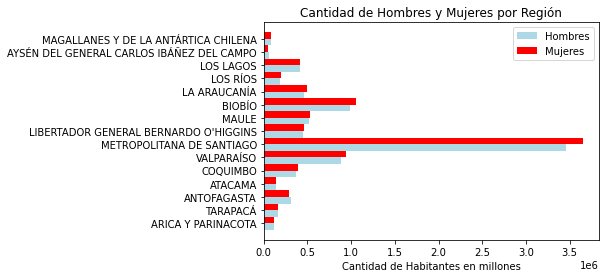

In [45]:
fig,ax = plt.subplots()

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
#y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha
# Cambiamos bar por barh para tener una barra horizontal

barraH = ax.barh(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.barh(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")

# Ahora debemos cambiar las anotaciones del eje "y" por el "x" y viceversa.


#Pondremos nombre a nuestro eje de las abscisas
ax.set_xlabel('Cantidad de Habitantes en millones')
#Pondremos un título
ax.set_title('Cantidad de Hombres y Mujeres por Región')
#Agregaremos a cada par de barras un nombre
ax.set_yticks(ejeX)
#Agregaremos las etiquetas al eje de las ordenadas

ax.set_yticklabels(etiquetas)

#Agregaremos la leyenda de las barras
ax.legend()

### Nuestro grafico ha mejorado bastante, ahora le ampliaremos el tamaño

In [46]:
fig,ax = plt.subplots(figsize=(20,10))

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
#y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha
# Cambiamos bar por barh para tener una barra horizontal

barraH = ax.barh(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.barh(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")

# Ahora debemos cambiar las anotaciones del eje "y" por el "x" y viceversa.


#Pondremos nombre a nuestro eje de las abscisas
ax.set_xlabel('Cantidad de Habitantes en millones')
#Pondremos un título
ax.set_title('Cantidad de Hombres y Mujeres por Región')
#Agregaremos a cada par de barras un nombre
ax.set_yticks(ejeX)
#Agregaremos las etiquetas al eje de las ordenadas

ax.set_yticklabels(etiquetas)

#Agregaremos la leyenda de las barras
ax.legend()
